In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

The features are the given columns in the data and all the technical indicators

#### Steps

1. get the dataset
2. check if stationary
3. If not, apply differencing iteratively until it becomes stationary

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = ts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    """
    cut_off = 0.01
    pvalue = dftest[1]
    if pvalue < cut_off:
        print("it is likely stationary")
        
    else:
        print("It is likely non stationary")
    print dfoutput
    """

In [ ]:
import os
arr = os.listdir('/Users/Taaniya.Arora/Documents/Big_Data_Scientist/Datasets/stocks_data/prices_data/')

In [ ]:
df_list = []

for i in np.arange(len(arr)):
    df_list.append(pd.read_csv('/Users/Taaniya.Arora/Documents/Big_Data_Scientist/Datasets/stocks_data/prices_data/'+arr[i]))

In [ ]:
len(df_list)

12

In [ ]:
df = pd.concat(df_list,axis=0)

In [ ]:
df3 = df_list[0]                                  # first csv file

In [ ]:
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-04,253.199997,254.000000,248.020004,248.770004,213.306046,6417705.0
1,2013-04-05,248.089996,249.869995,243.440002,245.910004,210.853775,6484050.0
2,2013-04-08,245.300003,247.600006,239.600006,240.639999,206.335022,4864420.0
3,2013-04-09,242.070007,247.960007,239.759995,240.639999,206.335022,7490495.0
4,2013-04-10,242.960007,248.570007,240.000000,247.860001,212.525757,10046765.0


In [ ]:
df3.Timestamp = pd.to_datetime(df3.Date,format='%Y-%m-%d') 
df3.index = df3.Timestamp

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
type(df3['Adj Close'])

pandas.core.series.Series

In [ ]:
df4 = df3['Adj Close'].dropna()               
#df4 = df5.asfreq('D').fillna(method='ffill')

In [ ]:
df4

Date
2013-04-04    213.306046
2013-04-05    210.853775
2013-04-08    206.335022
2013-04-09    206.335022
2013-04-10    212.525757
2013-04-11    214.729401
2013-04-12    216.812988
2013-04-15    221.940491
2013-04-16    233.790359
2013-04-17    236.174042
2013-04-18    245.125748
2013-04-22    247.140747
2013-04-23    247.766663
2013-04-25    257.815857
2013-04-26    254.892029
2013-04-29    253.014206
2013-04-30    255.980957
2013-05-02    259.976685
2013-05-03    252.911331
2013-05-06    250.330444
2013-05-07    257.910217
2013-05-08    255.466492
2013-05-09    249.370056
2013-05-10    252.071014
2013-05-13    249.001389
2013-05-14    251.659470
2013-05-15    258.724792
2013-05-16    262.531830
2013-05-17    263.277802
2013-05-20    262.326050
                 ...    
2018-02-19    540.549988
2018-02-20    531.700012
2018-02-21    535.799988
2018-02-22    530.250000
2018-02-23    536.650024
2018-02-26    552.299988
2018-02-27    538.400024
2018-02-28    528.750000
2018-03-01    525.75

In [ ]:
print(df4.size)
df4.index

1221


DatetimeIndex(['2013-04-04', '2013-04-05', '2013-04-08', '2013-04-09',
               '2013-04-10', '2013-04-11', '2013-04-12', '2013-04-15',
               '2013-04-16', '2013-04-17',
               ...
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-04-02',
               '2018-04-03', '2018-04-04'],
              dtype='datetime64[ns]', name=u'Date', length=1221, freq=None)

In [ ]:
df4

Date
2013-04-04    213.306046
2013-04-05    210.853775
2013-04-08    206.335022
2013-04-09    206.335022
2013-04-10    212.525757
2013-04-11    214.729401
2013-04-12    216.812988
2013-04-15    221.940491
2013-04-16    233.790359
2013-04-17    236.174042
2013-04-18    245.125748
2013-04-22    247.140747
2013-04-23    247.766663
2013-04-25    257.815857
2013-04-26    254.892029
2013-04-29    253.014206
2013-04-30    255.980957
2013-05-02    259.976685
2013-05-03    252.911331
2013-05-06    250.330444
2013-05-07    257.910217
2013-05-08    255.466492
2013-05-09    249.370056
2013-05-10    252.071014
2013-05-13    249.001389
2013-05-14    251.659470
2013-05-15    258.724792
2013-05-16    262.531830
2013-05-17    263.277802
2013-05-20    262.326050
                 ...    
2018-02-19    540.549988
2018-02-20    531.700012
2018-02-21    535.799988
2018-02-22    530.250000
2018-02-23    536.650024
2018-02-26    552.299988
2018-02-27    538.400024
2018-02-28    528.750000
2018-03-01    525.75

In [ ]:
df4.index

DatetimeIndex(['2013-04-04', '2013-04-05', '2013-04-08', '2013-04-09',
               '2013-04-10', '2013-04-11', '2013-04-12', '2013-04-15',
               '2013-04-16', '2013-04-17',
               ...
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-04-02',
               '2018-04-03', '2018-04-04'],
              dtype='datetime64[ns]', name=u'Date', length=1221, freq=None)

In [ ]:
#plt.plot(df5[:1220])
#plt.figure(figsize=(1000,1000))
#plt.show()

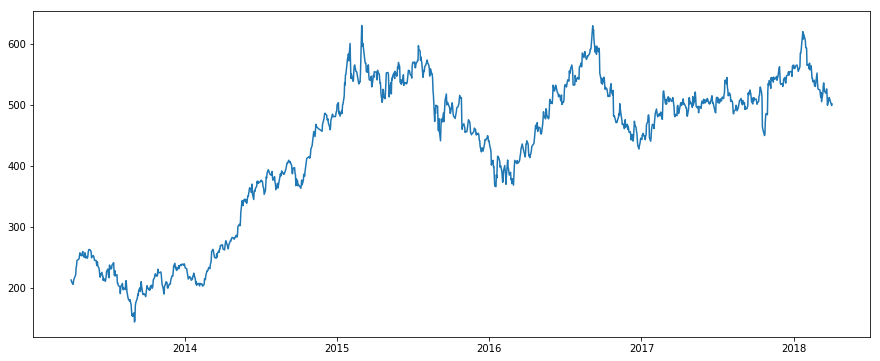

In [ ]:
plt.plot(df4[:1220])
plt.figure(figsize=(1000,1000))
plt.show()

In [ ]:
lnprice = np.log(df4[:854])                                                   # training set

In [ ]:
complete_lnprice = np.log(df4)

In [ ]:
lnprice.index

DatetimeIndex(['2013-04-04', '2013-04-05', '2013-04-08', '2013-04-09',
               '2013-04-10', '2013-04-11', '2013-04-12', '2013-04-15',
               '2013-04-16', '2013-04-17',
               ...
               '2016-09-26', '2016-09-27', '2016-09-28', '2016-09-29',
               '2016-09-30', '2016-10-03', '2016-10-04', '2016-10-05',
               '2016-10-06', '2016-10-07'],
              dtype='datetime64[ns]', name=u'Date', length=854, freq=None)

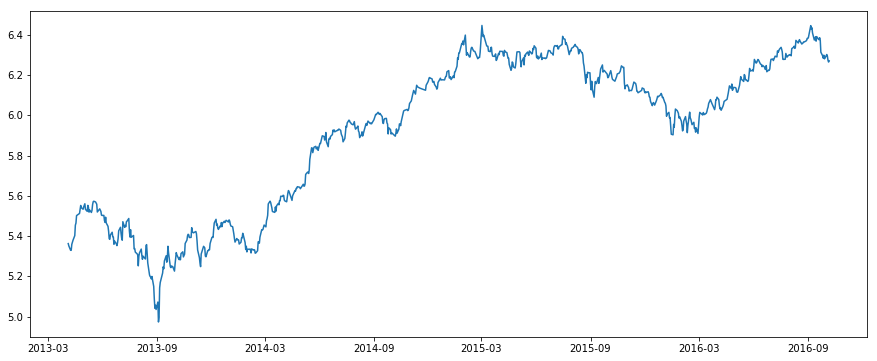

In [ ]:
plt.plot(lnprice[:1220])
plt.show()

**Checking for stationarity**


A stationary time series is one where the mean and the variance are both constant over time or is one whose properties do not depend on the time at which the series is observed. 
A stationary time series is all drwan from the *same probability distribution* having the same mean, variance and standard deviation and all other parameters.

Thus, the time series is a flat series without trend, constant variance over time, a constant mean, a constant autocorrelation and no seasonality. This makes a stationary time series easy to predict. On the other hand, a non-stationary time series is one where either mean or variance or both are not constant over time.

There are different tests that can be used to check whether a given time series is stationary. These include the Autocorrelation function (ACF), Partial autocorrelation function (PACF), Ljung-Box test, Augmented Dickey–Fuller (ADF) t-statistic test, and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.

**Decomposing time series**

A time series generally comprises of a trend component, irregular (noise) component, and can also have a seasonal component, in the case of a seasonal time series. Decomposing time series means separating the original time series into these components.

Trend – The increasing or decreasing values in a given time series.

Seasonal – The repeating cycle over a specific period (day, week, month, etc.) in a given time series.

Irregular (Noise) – The random (irregularity) of values in a given time series

a time series might include a seasonal component or an irregular component. In such a case, we would not get a true picture of the trending property of the time series. Hence, we need to separate out the seasonality effect and/or the noise which will give us a clear picture, and help in further analysis.

There are two structures which can be used for decomposing a given time series.

Additive decomposition – If the seasonal variation is relatively constant over time, we can use the additive structure for decomposing a given time series. The additive structure is given as –
Xt = Trend + Random + Seasonal

Multiplicative decomposition – If the seasonal variation is increasing over time, we can use the multiplicative structure for decomposing a time series. The multiplicative structure is given as –
Xt = Trend \* Random \* Seasonal

**Using Autocorrelation function**


Finding autocorrelation of every data point in time yt with each of its past 40 lags (time data points).
This function returns a correlation coefficient of the current point with each of its lag.
Expectedly it should decrease with time as we go back. 

**Lag** – It is the time gap considered.

**Lag 1 autocorrelation** is the correlation between values that are one time period apart. 
Before training, convert the input stock prices into log because stock prices are based on returns and returns are based on percentages 

Autocorrelation of first lag
Autocorrelation – correlation between one data point in time series and its previous one i.e correlation between the lags. 


**Autoregression Intuition**

Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.
This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.
This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

**Moving Average Intuition**

Consider a time series that was generated by a moving average (MA) process with a lag of k.
Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.
We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.
For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.
Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

What is the use of ACF and PACF? 

The pattern of the acf/pacf plot gives us an idea towards which model could be the best fit for doing prediction.


### Autocorrelation Function (ACF)

* It is the proportion of the autocovariance of $y_t$ and $y_{t-k}$ to the variance of a dependent  variable $y_t$ 

$$ ACF(k) = \rho  = \frac{Cov(y_t, y_{t-k})}{Var(y_t)}   $$

* The autocorrelation function ACF(k) gives the ** *Gross correlation* ** between $y_t$ and $y_{t-k}$.

* For an AR(1) model, the ACF(k) is 

   $$ ACF(k) = \rho = \gamma^k  $$
   
   We say that this function tails off.


###  Partial autocorrelation (PACF)

* PACF is the simple correlation between $y_t$ and $y_{t-k}$ minus the part explained by the intervening lags.

$$ {\rho^*}_{k} = Corr[y_t - E^*(y_t | y_{t-1}, ....,y_{t-k+1}),y_{t-k})]   $$

where $ E^*(y_t | y_{t-1}, ....,y_{t-k+1}) $  is the minimum mean-squared error predictor of $y_t$ by $ y_{t-1}, ....,y_{t-k+1} $.

* For an AR(1) model, PACF is $\gamma $ for the first lag and then cuts off.

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


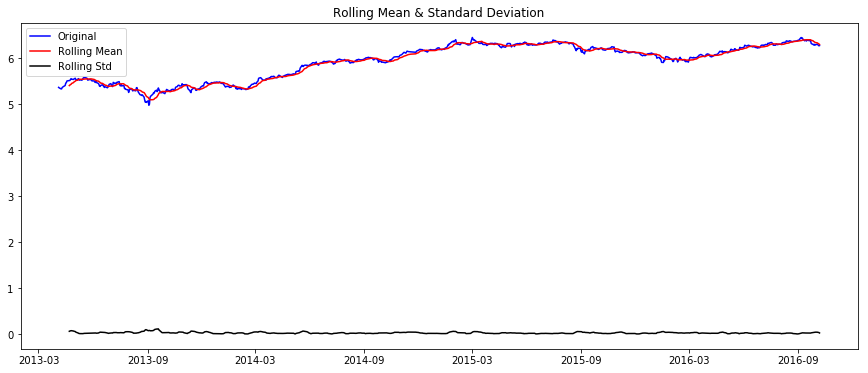

Results of Dickey-Fuller Test:
It is likely non stationary
Test Statistic                  -1.329291
p-value                          0.615667
#Lags Used                       2.000000
Number of Observations Used    851.000000
Critical Value (5%)             -2.864942
Critical Value (1%)             -3.438058
Critical Value (10%)            -2.568582
dtype: float64


In [ ]:
test_stationarity(lnprice)

**The Correlogram**

A correlogram is simply a plot of the autocorrelation function for sequential values of lag $k=0,1,...,n$. It allows us to see the correlation structure in each lag.

The main usage of correlograms is to detect any autocorrelation subsequent to the removal of any deterministic trends or seasonality effects.

Notice that the ACF plot decreases in an almost linear fashion as the lags increase. Hence a correlogram of this type is clear indication of a trend.

When we work for time series model, we should ensure that we have stationary model.
Stationary i.e constant mean, constant variance, constant autocorrelation 

Why stationary?

Consider a sequence of random variables {Xt} indexed by t∈Z and taking values in RR
Thus, {Xt} begins in the infinite past and extends to the infinite future — a convenient and standard assumption
As in other fields, successful economic modeling typically assumes the existence of features that are constant over time
If these assumptions are correct, then each new observation Xt, Xt+1,…Xt,Xt+1,… can provide additional information about the time-invariant features, allowing us to learn from as data arrive
For this reason, we will focus in what follows on processes that are stationary — or become so after a transformation 


**Augmented Dickey-Fuller test** 

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be accepted or rejected. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The **Augmented Dickey-Fuller** test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

In [ ]:
result = ts.adfuller(lnprice)

The resulting p-value must be lower than the critical values to denote that the time series is stationary.

In [ ]:
result

(-1.329291122535754,
 0.6156673538691803,
 2L,
 851L,
 {'1%': -3.438057561354894,
  '10%': -2.5685816343390853,
  '5%': -2.864942268638857},
 -3931.8494542449735)

#### 1st order differencing 

In [ ]:
lnprice_diff = lnprice-lnprice.shift()                      # differencing first order
diff = lnprice_diff.dropna()

** visualising differenced data**

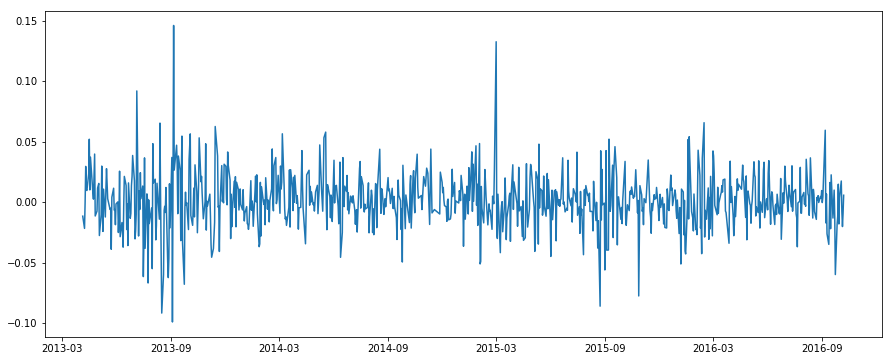

In [ ]:
plt.plot(diff)
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


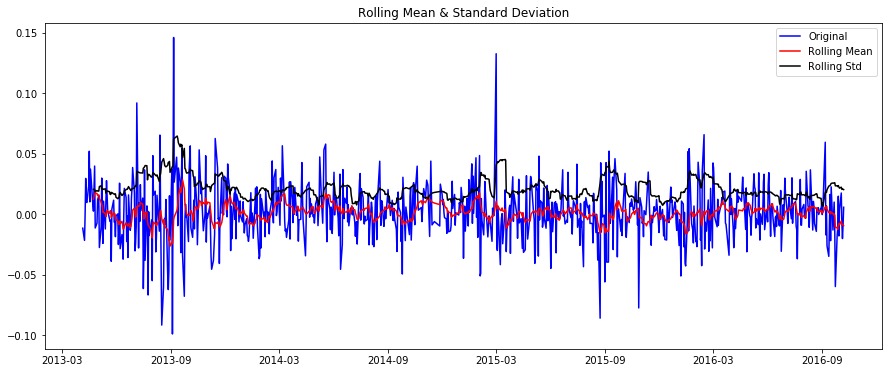

Results of Dickey-Fuller Test:
it is likely stationary
Test Statistic                 -21.521167
p-value                          0.000000
#Lags Used                       1.000000
Number of Observations Used    851.000000
Critical Value (5%)             -2.864942
Critical Value (1%)             -3.438058
Critical Value (10%)            -2.568582
dtype: float64


In [ ]:
test_stationarity(diff)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. 

In [ ]:
decomposition = seasonal_decompose(lnprice,freq=7)

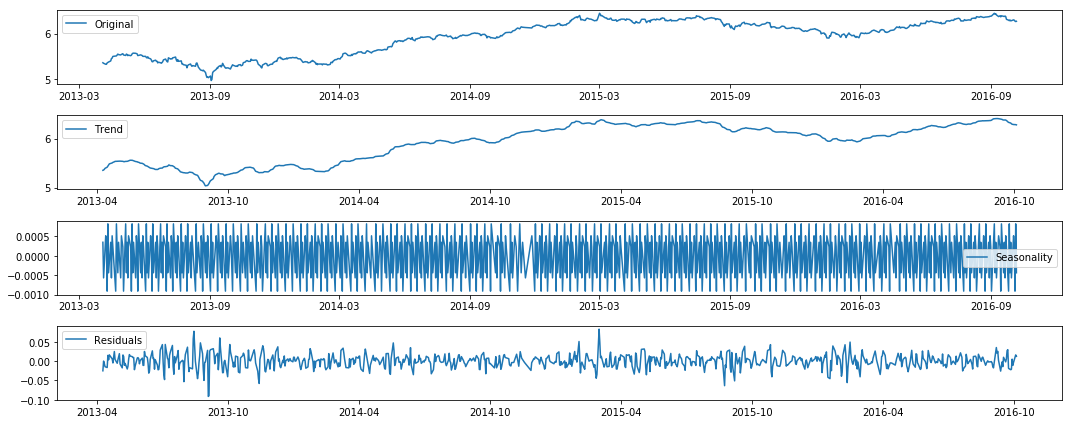

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(lnprice, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


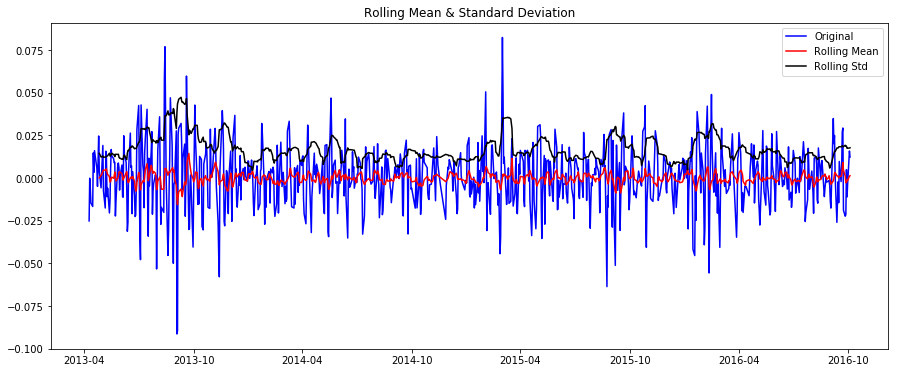

Results of Dickey-Fuller Test:
it is likely stationary
Test Statistic                -1.132813e+01
p-value                        1.130117e-20
#Lags Used                     1.900000e+01
Number of Observations Used    8.280000e+02
Critical Value (5%)           -2.865037e+00
Critical Value (1%)           -3.438272e+00
Critical Value (10%)          -2.568632e+00
dtype: float64


In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
decomposition_multiplicative = seasonal_decompose(lnprice,freq=7,model="multiplicative")

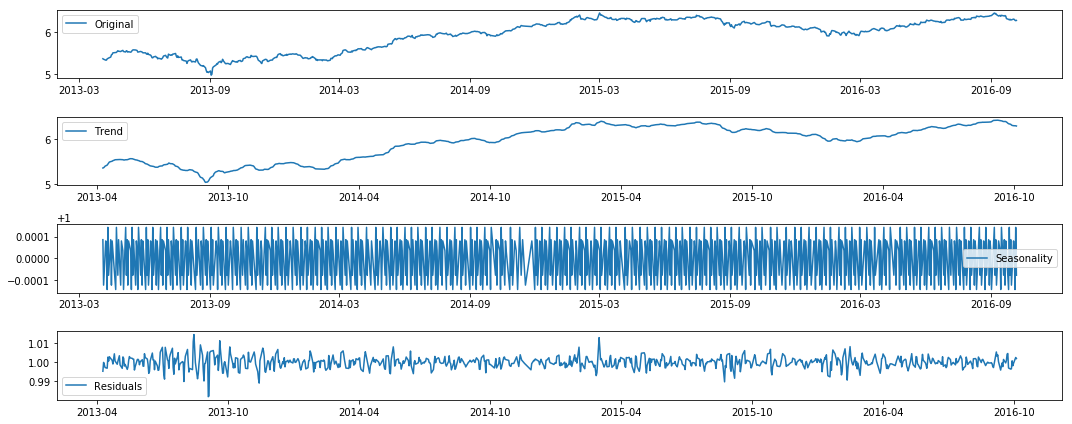

In [ ]:
trend2 = decomposition_multiplicative.trend
seasonal2 = decomposition_multiplicative.seasonal
residual2 = decomposition_multiplicative.resid

plt.subplot(411)
plt.plot(lnprice, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


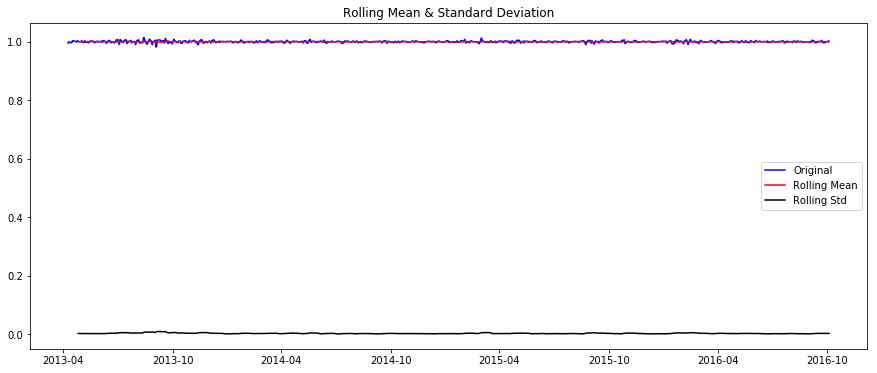

Results of Dickey-Fuller Test:
it is likely stationary
Test Statistic                -1.131824e+01
p-value                        1.191831e-20
#Lags Used                     1.900000e+01
Number of Observations Used    8.280000e+02
Critical Value (5%)           -2.865037e+00
Critical Value (1%)           -3.438272e+00
Critical Value (10%)          -2.568632e+00
dtype: float64


In [ ]:
ts_log_decompose2 = residual2
ts_log_decompose2.dropna(inplace=True)
test_stationarity(ts_log_decompose2)

In [ ]:
lag_acf = acf(diff, nlags= 20)[1:20]
test_df2 = pd.DataFrame([acf_1_diff]).T

In [ ]:
lag_pacf = pacf(lnprice, nlags=20, method='ols')

Text(0.5,1,u'Autocorrelation Function')

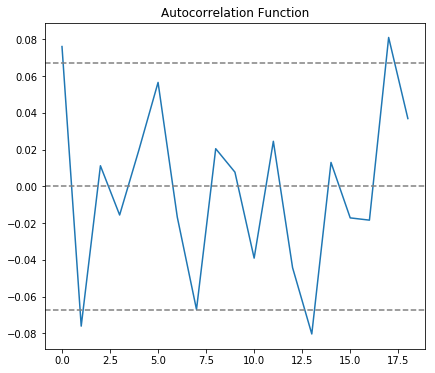

In [ ]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

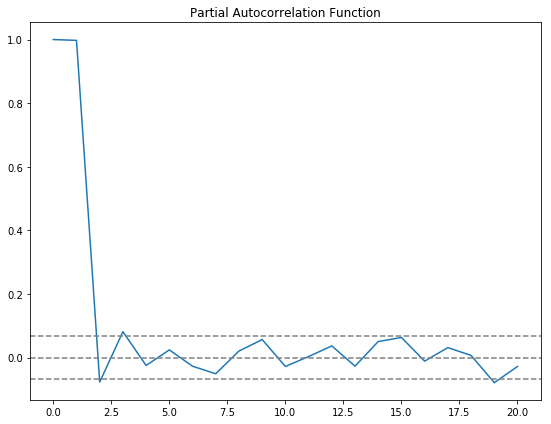

In [ ]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. here p=0

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

### AR Model

In [ ]:
diff_new = diff[1:]

In [ ]:
diff_new.size

852

In [ ]:
results_AR.fittedvalues.size

852

Text(0.5,1,u'RSS: 0.7272')

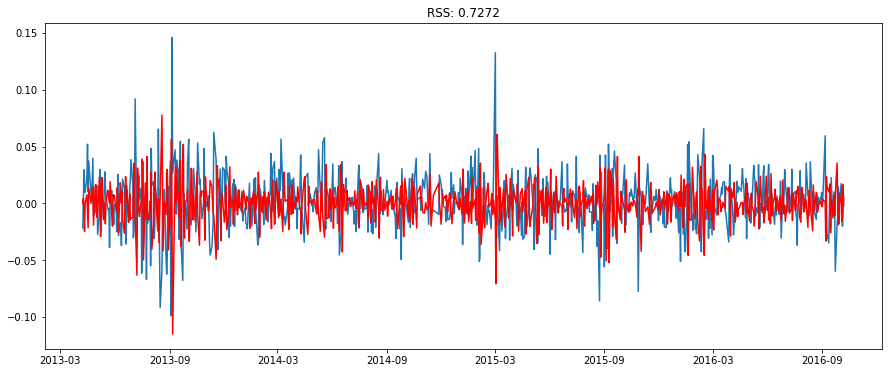

In [ ]:
model = ARIMA(diff, order=(2, 1,0))  
results_AR = model.fit(disp=-1)  
fitted_Values = results_AR.fittedvalues[1]
plt.plot(diff_new)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-diff_new)**2))

### MA model

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5,1,u'RSS: 0.8688')

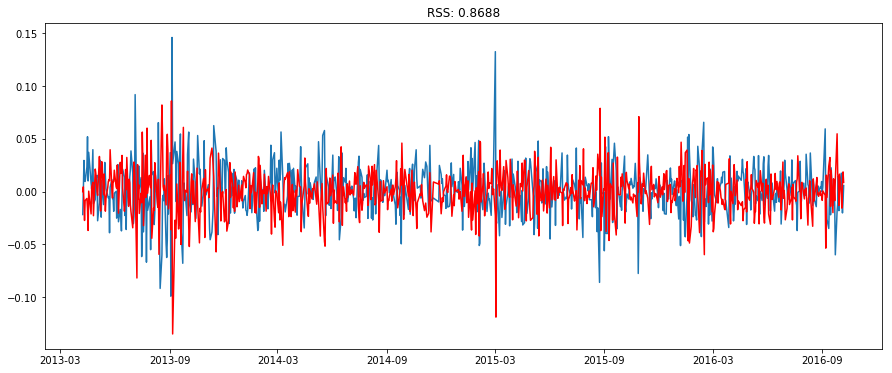

In [ ]:
model = ARIMA(diff, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(diff_new)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-diff_new)**2))

### combined ARIMA model

Text(0.5,1,u'RSS: 0.8746')

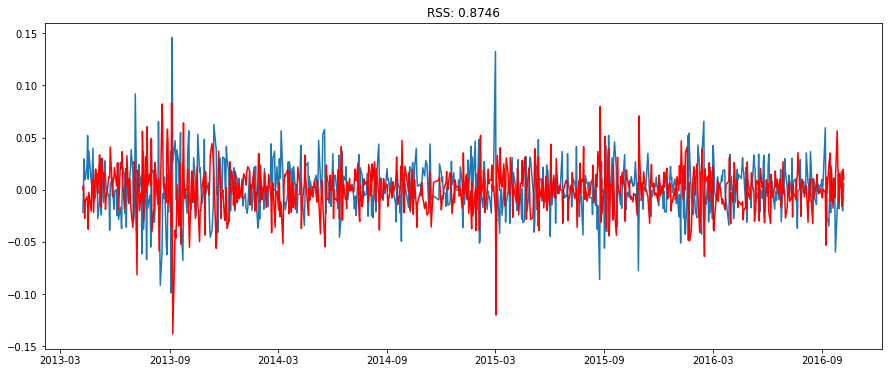

In [ ]:
model = ARIMA(diff, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(diff_new)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-diff_new)**2))

In [ ]:
diff.tail()

Date
2016-10-03    0.017487
2016-10-04   -0.007836
2016-10-05   -0.020143
2016-10-06   -0.009189
2016-10-07    0.005730
Name: Adj Close, dtype: float64

In [ ]:
diff.size

853

In [ ]:
complete_lnprice['2016-10-07':]

Date
2016-10-07    6.270338
2016-10-10    6.266020
2016-10-13    6.241741
2016-10-14    6.245301
2016-10-17    6.242127
2016-10-18    6.267712
2016-10-19    6.273517
2016-10-20    6.281885
2016-10-21    6.255714
2016-10-24    6.247028
2016-10-25    6.261400
2016-10-26    6.179616
2016-10-27    6.175711
2016-10-28    6.178282
2016-11-01    6.155220
2016-11-02    6.157320
2016-11-03    6.155326
2016-11-04    6.161297
2016-11-07    6.175196
2016-11-08    6.186361
2016-11-09    6.179616
2016-11-10    6.218635
2016-11-11    6.202328
2016-11-15    6.162550
2016-11-16    6.148684
2016-11-17    6.151641
2016-11-18    6.150269
2016-11-21    6.133765
2016-11-22    6.144550
2016-11-23    6.165050
                ...   
2018-02-19    6.292587
2018-02-20    6.276079
2018-02-21    6.283761
2018-02-22    6.273349
2018-02-23    6.285346
2018-02-26    6.314091
2018-02-27    6.288602
2018-02-28    6.270516
2018-03-01    6.264826
2018-03-05    6.262541
2018-03-06    6.248720
2018-03-07    6.239593
2018-0

In [ ]:
datetime(2016,10,10)

datetime.datetime(2016, 10, 10, 0, 0)

In [ ]:
ARIMA_predictions = results_ARIMA.predict(start='2016-10-7', end='2018-4-4',frequency='daily')

TypeError: predict() got an unexpected keyword argument 'frequency'

In [ ]:
ARIMA_predictions = results_ARIMA.predict(start=datetime(2016,10,10), end=datetime(2018,4,4))

ValueError: There is no frequency for these dates and date 2016-10-10 00:00:00 is not in dates index. Try giving a date that is in the dates index or use an integer

In [ ]:
ARIMA_predictions = results_ARIMA.predict(start=,end=1221)

In [ ]:
results_ARIMA.summary()

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  852
Model:                 ARIMA(2, 1, 2)   Log Likelihood                2013.306
Method:                       css-mle   S.D. of innovations              0.023
Date:                Fri, 20 Apr 2018   AIC                          -4014.613
Time:                        16:18:42   BIC                          -3986.127
Sample:                    04-08-2013   HQIC                         -4003.702
                         - 10-07-2016                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -9.89e-07   3.01e-06     -0.328      0.743   -6.89e-06    4.91e-06
ar.L1.D.Adj Close     0.0491        nan        nan        nan         nan         nan
ar.L2.D.Adj Close    -0.0819        nan        nan        nan         nan         nan
ma.L1.D.Adj Close    -0.9578        nan        nan        nan         nan         nan
ma.L2.D.Adj Close    -0.0357        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2997           -3.4821j            3.4950           -0.2363
AR.2            0.2997           +3.4821j            3.4950            0.2363
MA.1            1.0063           +0.0000j            1.0063            0.0000
MA.2          -27.8706           +0.0000j           27.8706            0.5000
-----------------------------------------------------------------------------
"""

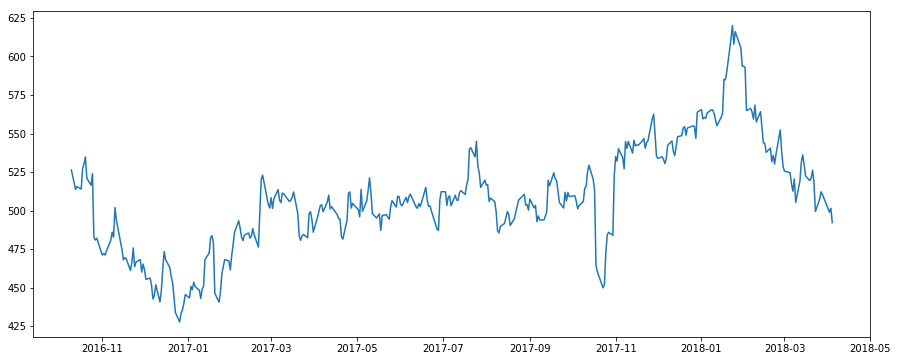

In [ ]:
plt.plot(df4[854:1221])
plt.show()

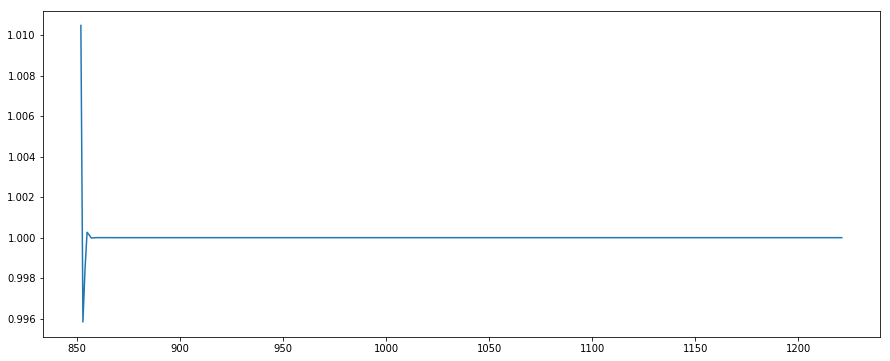

In [ ]:
plt.plot(np.exp(ARIMA_predictions))
plt.show()

## scaling it back

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Date
2013-04-08   -9.890365e-07
2013-04-09    4.193526e-03
2013-04-10   -8.607192e-03
2013-04-11   -2.760731e-02
2013-04-12   -1.071490e-02
dtype: float64


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Date
2013-04-08   -9.890365e-07
2013-04-09    4.192537e-03
2013-04-10   -4.414655e-03
2013-04-11   -3.202196e-02
2013-04-12   -4.273686e-02
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(lnprice.ix[0], index=lnprice.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-04-04    5.362728
2013-04-05    5.362728
2013-04-08    5.362727
2013-04-09    5.366921
2013-04-10    5.358313
dtype: float64

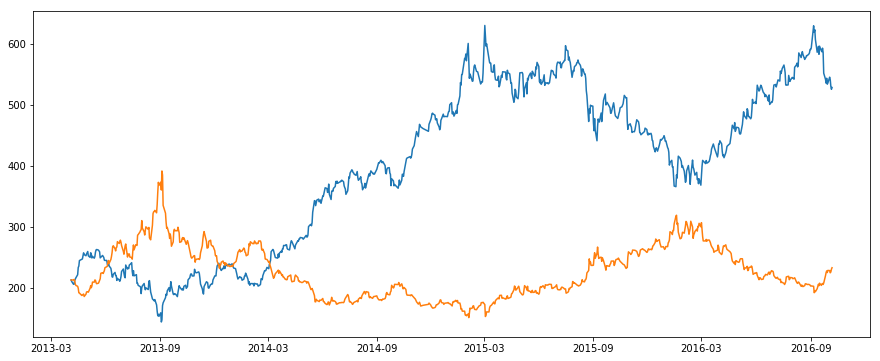

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df4[:854])
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(df4[:854])))

In [ ]:
acf1 = acf(lnprice)                                      # autocorrelation for 1D array
test_df = pd.DataFrame(acf1)

acf1.size

41

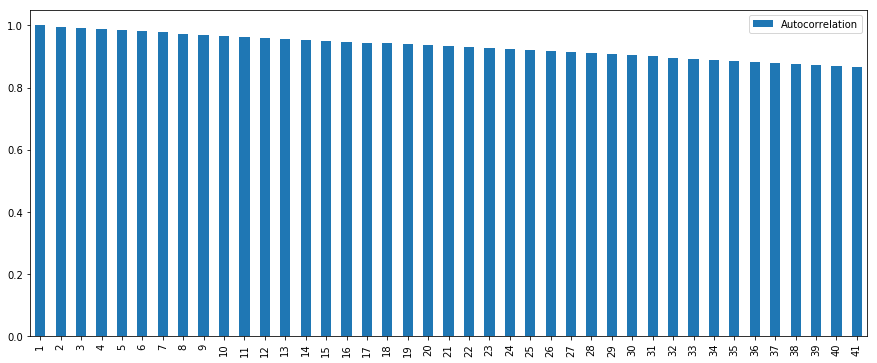

In [ ]:
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

pacf1 = pacf(lnprice)
test_df2 = pd.DataFrame(pacf1)
test_df2.columns = ['Partial Autocorrelation']
test_df2.index+=1
test_df2.plot(kind='bar')
plt.show()

In [ ]:
test_df2

,0
0,0.073855
1,-0.069708
2,0.004610
3,-0.017360
4,-0.006230
5,0.026908
6,-0.019430
7,-0.075295
8,0.019390
9,0.010903


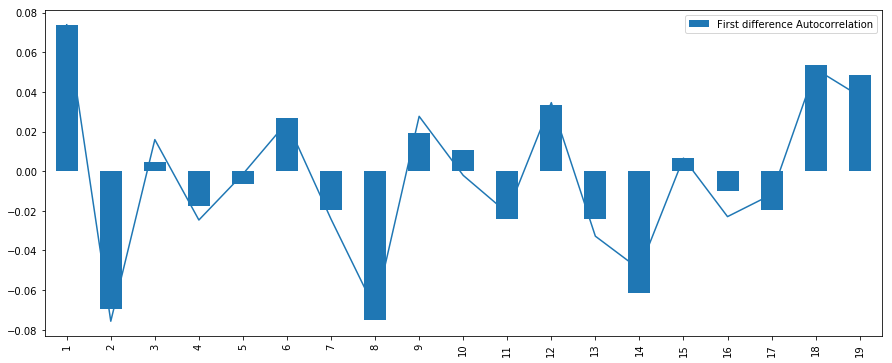

In [ ]:
test_df2.columns = ['First difference Autocorrelation']
test_df2.index += 1
test_df2.plot(kind='bar')
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

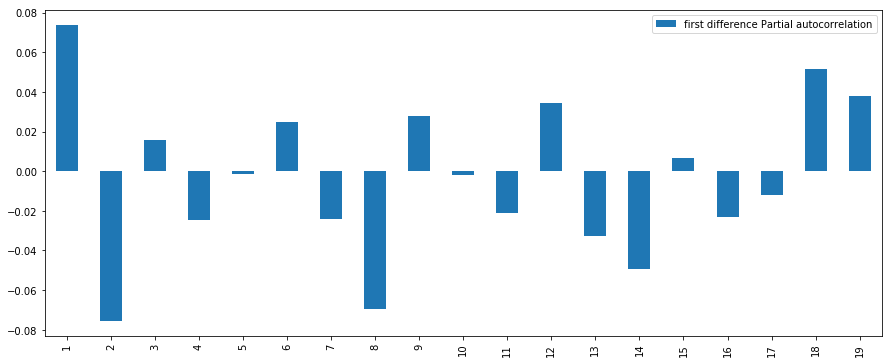

In [ ]:
test_df = pd.DataFrame([pacf_1_diff]).T
test_df.columns = ['first difference Partial autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

In [ ]:
lnprice.head(10)

Date
2013-04-04    5.362728
2013-04-05    5.351165
2013-04-08    5.329501
2013-04-09    5.329501
2013-04-10    5.359063
2013-04-11    5.369379
2013-04-12    5.379035
2013-04-15    5.402409
2013-04-16    5.454425
2013-04-17    5.464569
Name: Adj Close, dtype: float64

In [ ]:
price_matrix = diff.as_matrix()
arima_instance = ARIMA(price_matrix, order=(2,1,0))
Arima_model = arima_instance.fit(disp=0)


In [ ]:
type(price_matrix)

numpy.ndarray

In [ ]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  852
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1893.827
Method:                       css-mle   S.D. of innovations              0.026
Date:                Fri, 20 Apr 2018   AIC                          -3779.655
Time:                        11:29:36   BIC                          -3760.664
Sample:                             1   HQIC                         -3772.381
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.031e-05      0.000      0.022      0.982      -0.001       0.001
ar.L1.D.y     -0.5714      0.032    -17.943      0.000      -0.634      -0.509
ar.L2.D.y     -0.3677      0.032    -11.555      0.000      -0.430      -0.305
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7769           -1.4546j            1.6491           -0.3281
AR.2           -0.7769           +1.4546j            1.6491            0.3281
-----------------------------------------------------------------------------
"""

In [ ]:
predictions = Arima_model.predict(start=1222,end=1252)

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
predictions

array([-1.25320179e-02,  1.69474049e-03,  3.65981905e-03, -2.69432005e-03,
        2.13707282e-04,  8.88615582e-04, -5.66325711e-04,  1.68228909e-05,
        2.18623426e-04, -1.11111027e-04,  3.08732729e-06,  5.90840706e-05,
       -1.49031934e-05,  6.78079530e-06,  2.15970095e-05,  5.15792034e-06,
        9.10274931e-06,  1.28936022e-05,  9.27703834e-06,  9.94952055e-06,
        1.08951307e-05,  1.01075516e-05,  1.02098447e-05,  1.04409985e-05,
        1.02713082e-05,  1.02832675e-05,  1.03388312e-05,  1.03026858e-05,
        1.03029071e-05,  1.03160717e-05,  1.03084684e-05,  1.03079720e-05,
        1.03110515e-05,  1.03094745e-05,  1.03092432e-05,  1.03099552e-05,
        1.03096334e-05,  1.03095554e-05,  1.03097183e-05,  1.03096539e-05,
        1.03096308e-05,  1.03096677e-05,  1.03096551e-05,  1.03096488e-05,
        1.03096570e-05,  1.03096546e-05,  1.03096530e-05,  1.03096548e-05,
        1.03096544e-05,  1.03096539e-05,  1.03096543e-05,  1.03096543e-05,
        1.03096542e-05,  

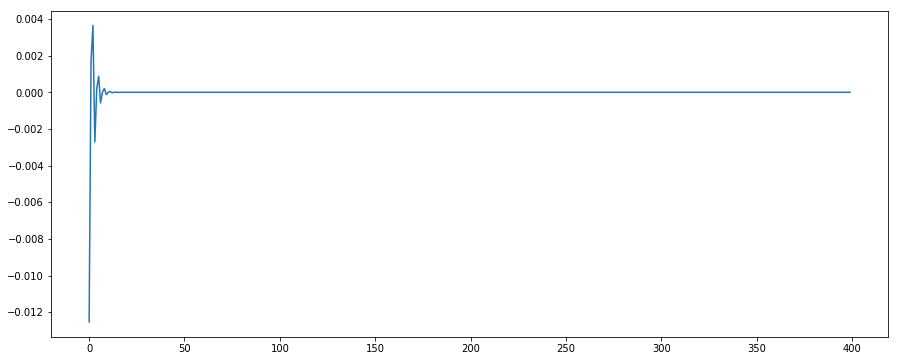

In [ ]:
plt.plot(predictions)
#plt.plot(complete_lnprice)
plt.figure(figsize=(1000,1000))
plt.show()

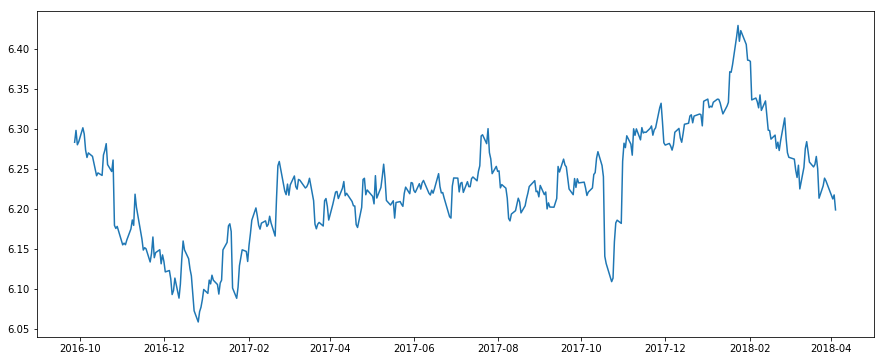

In [ ]:
plt.plot(complete_lnprice[845:1221])
plt.figure(figsize=(1000,1000))
plt.show()

In [ ]:
type(Arima_model)

statsmodels.tsa.arima_model.ARIMAResultsWrapper

If we take the likelihood function for a statistical model, which has $k$ parameters, and $L$ maximises the likelihood, then the Akaike Information Criterion is given by:

\begin{eqnarray} AIC = -2 \text{log} (L) + 2k \end{eqnarray}
The preferred model, from a selection of models, has the minium AIC of the group. You can see that the AIC grows as the number of parameters, $k$, increases, but is reduced if the negative log-likelihood increases. Essentially it penalises models that are overfit.

We are going to be creating AR, MA and ARMA models of varying orders and one way to choose the "best" model fit a particular dataset is to use the AIC. This is what we'll be doing in the next article, primarily for ARMA models.

A time series model, $\{ x_t \}$, is an autoregressive model of order $p$, AR(p), if:

\begin{eqnarray} x_t &=& \alpha_1 x_{t-1} + \ldots + \alpha_p x_{t-p} + w_t \\ &=& \sum_{i=1}^p \alpha_i x_{t-i} + w_t \end{eqnarray}
Where $\{ w_t \}$ is white noise and $\alpha_i \in \mathbb{R}$, with $\alpha_p \neq 0$ for a $p$-order autoregressive process.

If we consider the Backward Shift Operator, ${\bf B}$ (see previous article) then we can rewrite the above as a function $\theta$ of ${\bf B}$:

\begin{eqnarray} \theta_p ({\bf B}) x_t = (1 - \alpha_1 {\bf B} - \alpha_2 {\bf B}^2 - \ldots - \alpha_p {\bf B}) x_t = w_t \end{eqnarray}
Perhaps the first thing to notice about the AR(p) model is that a random walk is simply AR(1) with $\alpha_1$ equal to unity. As we stated above, the autogressive model is an extension of the random walk, so this makes sense!

It is straightforward to make predictions with the AR(p) model, for any time $t$, as once we have the $\alpha_i$ coefficients determined, our estimate simply becomes:

\begin{eqnarray} \hat{x}_t = \alpha_1 x_{t-1} + \ldots + \alpha_p x_{t-p} \end{eqnarray}
Hence we can make $n$-step ahead forecasts by producing $\hat{x}_t$, $\hat{x}_{t+1}$, $\hat{x}_{t+2}$, etc up to $\hat{x}_{t+n}$. In fact, once we consider the ARMA models in Part 2, we will use the R predict function to create forecasts (along with standard error confidence interval bands) that will help us produce trading signals.

If a time series model is second order stationary then the (population) serial covariance or autocovariance, of lag $k$, $C_k = E[(x_t-\mu)(x_{t+k}-\mu)]$.


### References -

* https://www.reddit.com/r/stocks/comments/5mfdjk/howto_technical_trading_using_python_and_machine/ 
* https://www.quantinsti.com/blog/starting-time-series/ 
* https://www.quantinsti.com/blog/forecasting-stock-returns-using-arima-model/
* https://www.investopedia.com/terms/c/closingprice.asp
* http://financeformulas.net/Total-Stock-Return.html 
* https://machinelearningmastery.com/time-series-data-stationary-python/
* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
* https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/ 
* https://machinelearningmastery.com/time-series-data-stationary-python/ 
* http://www.michaeljgrogan.com/arima-model-statsmodels-python/ 
* https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
* https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
* https://machinelearningmastery.com/time-series-seasonality-with-python/
* https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3